In [1]:
import matplotlib
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_name)

In [2]:
import os
os.chdir('C:/pytest/')

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('감성대화말뭉치(최종데이터)_Validation.csv', encoding = 'cp949')

In [5]:
df1 = pd.read_csv('사람문장150_299.csv', encoding = 'cp949')

In [6]:
df2 = pd.read_csv('사람문장_300-449.csv', encoding = 'cp949')

In [7]:
data = pd.read_csv('감정분류.csv', encoding = 'cp949')

In [8]:
def judge(res):
    if res == '긍정':
        res = 1

    elif res == '중립':
        res = 0

    else:
        res = -1

    return res
        

In [9]:
data

,Unnamed: 0,감정_대분류,사람문장1
0,0,부정,요즘 부모님과 많이 부딪혀.
1,1,부정,엄마가 결국 집을 나갔어. 너무 너무 슬퍼.
2,2,부정,학교에서 한 친구를 괴롭히는 무리에게 그만하라고 했어.
3,3,부정,이번에 팀장님이 간단한 조사 업무를 부탁하셨는데 내가 잘못 처리했어. 너무 절망적이야.
4,4,부정,남편이 이혼할 때 위자료를 주지 않으려고 변호사를 고용했어.
...,...,...,...
145,145,부정,친정엄마가 항암치료 때문에 고생하시는 걸 보니까 내 마음이 너무 힘들어.
146,146,부정,결혼까지 하려고 했던 여자친구와 헤어졌어.
147,147,부정,나는 돈이 없어서 결혼할 수 없을 것 같아.
148,148,부정,취업이 너무 힘들어. 나는 직업을 가지지 못할 것 같아.


In [10]:
data = data[['사람문장1', '감정_대분류']]

In [11]:
data['감정_대분류'] = data['감정_대분류'].apply(judge)

c:\project\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
data.to_csv('사람문장0_149.csv', encoding = 'cp949', index = False)

In [13]:
def read_data(filename, encoding = 'cp949'):
    with open(filename, 'r', encoding = encoding) as f:
        data = [line for line in f.read().splitlines()]
    return data

def write_data(data, filename, encoding = 'cp949'):
    with open(filename, 'w', encoding = encoding) as f:
        f.write(data)

In [14]:
data['사람문장1'] = data['사람문장1'].apply(morph_data)

NameError: name 'morph_data' is not defined

In [ ]:
pd.set_option('display.max_rows', None)

In [16]:
data2 = pd.read_csv('Sentiment_601_1200_2team.csv', encoding = 'cp949')

In [17]:
data2.head()

,sentence,label
0,내 신체나이가 실제 나이보다 어리게 나왔어! 정말 너무 기뻐.,1
1,우리 아이들이 아직 건강한 내 유산에 욕심을 내는 것 같아 혼란스러워.,-1
2,내일 드디어 첫 출근 날이라 너무 긴장돼. 첫날부터 실수하지는 않을까 두려워.,-1
3,내 친구는 공부도 잘하니 앞 길 걱정 없어서 부러워 죽겠다.,-1
4,이번 프로젝트 때문에 업무적으로 스트레스를 받을 정도로 열심히 했는데 그게 무산이 됬어.,0


In [18]:
positive = read_data('positive_fin2.txt')
negative = read_data('negative_fin2.txt')

In [19]:
def sep_df(data, range1, range2):
    temp = data.loc[range1:range2,'sentence']
    return temp

In [20]:
data_df = sep_df(data2, 0, 599)

In [21]:
data_senti = data2.loc[0:599,'label']

In [22]:
import rhinoMorph
rn = rhinoMorph.startRhino()

filepath:  c:\project\venv\lib\site-packages
classpath:  c:\project\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


In [23]:
def morph_data(line):
    
    morphed_data = rhinoMorph.onlyMorph_list(rn, line, pos=['NNG','NNP','VV','VA','XR','IC','MM','MAG','MAJ'], eomi = True)
    joined_data = ' '.join(morphed_data) # 문자열을 하나로 연결
    if joined_data: # 내용이 있는 경우만 저장하게 함
        line = joined_data
    
    return line

In [24]:
data_df = data_df.apply(morph_data)

In [25]:
data_text = list(data_df)

In [26]:
positive = ' '.join(positive)
negative = ' '.join(negative)

In [27]:
morphed_positive = rhinoMorph.onlyMorph_list(rn, positive, pos=['NNG','NNP','VV','VA','XR','IC','MM','MAG','MAJ'], eomi = True)
morphed_negative = rhinoMorph.onlyMorph_list(rn, negative, pos=['NNG','NNP','VV','VA','XR','IC','MM','MAG','MAJ'], eomi = True)

In [28]:
def cntWordInLine(data, senti):
    senti_found = []
    for onedata in data:
        oneline_word = onedata.split(' ')
        senti_temp = 0
        for sentiword in senti:
            if sentiword[0] in oneline_word:
                senti_temp += 1
        senti_found.append(senti_temp)
    return senti_found

In [29]:
data_senti_poscnt = cntWordInLine(data_text, morphed_positive)
data_senti_negcnt = cntWordInLine(data_text, morphed_negative)

In [30]:
print(data_senti_poscnt[:20])
print(data_senti_negcnt[:20])

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 1, 4, 0, 3]


In [31]:
import pandas as pd
newdata = pd.DataFrame({'text':data_text, 'original' : data_senti,'pos':data_senti_poscnt, 'neg':data_senti_negcnt})
senti_score = newdata['pos'] - newdata['neg']
newdata['senti_score'] = senti_score

newdata.loc[newdata.senti_score > 0, 'new'] = 1
newdata.loc[newdata.senti_score <= 0, 'new'] = -1

newdata.loc[pd.to_numeric(newdata.original) == newdata.new, 'matched'] = 'True'
newdata.loc[pd.to_numeric(newdata.original) != newdata.new, 'matched'] = 'False'

In [32]:
score = newdata.matched.str.count('True').sum() / (newdata.matched.str.count('True').sum() + newdata.matched.str.count('False').sum()) * 100
print(score)

64.21404682274247


In [33]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))
newdata['sigmoid'] = newdata.senti_score.apply(sigmoid)


In [34]:
newdata

,text,original,pos,neg,senti_score,new,matched,sigmoid
0,신체 나이 실제 나이 어리다 나오다 정말 너무 기쁘다,1,0,0,0,-1.0,False,0.500000
1,아이 아직 건강 하다 유산 욕심 같다 혼란,-1,0,0,0,-1.0,True,0.500000
2,내일 드디어 첫 출근 날 너무 긴장 되다 첫날 실수 두렵다,-1,0,0,0,-1.0,True,0.500000
3,친구 공부 잘하다 앞 길 걱정 없다 부럽다 죽다,-1,0,0,0,-1.0,True,0.500000
4,이번 프로젝트 업무 스트레스 받다 정도 열심히 하다 무산,0,0,0,0,-1.0,False,0.500000
...,...,...,...,...,...,...,...,...
593,더 치료 받다 의미 있다 좌절감 들다,-1,0,0,0,-1.0,True,0.500000
594,재무 설계 전문가 만나다 상담 하다 심란 생각 많다 아지,-1,0,0,0,-1.0,True,0.500000
595,큰아이 다음 달 군대 가다 평소 좀 잘 하다 못하다 후회 되다,-1,1,1,0,-1.0,True,0.500000
596,상사 업무 지적 하다 인격 모독 하다 정말 비참,-1,0,0,0,-1.0,True,0.500000


In [39]:
newdata['new'].value_counts().values / len(newdata)

array([0.9916388, 0.0083612])

In [62]:
import matplotlib.pyplot as plt

def draw_pi(df, column):
    index = df[column].value_counts().index
    value = df[column].value_counts().values
    rate = (value / len(df)) * 100
    explode = [0.05] * len(index)

    plt.pie(rate, labels=index, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode,colors = ['#ff9999', '#8fd9b6'])
    plt.show() 

In [67]:
import matplotlib.pyplot as plt

def draw_multi_pi(df, column):
    df_sum = []
    for col in column:
        temp = df[col].sum()
        df_sum.append(temp)
    rate = [(s / len(df)) * 100 for s in df_sum]
    explode = [0.05] * len(column)

    plt.pie(rate, labels=column, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode,colors = ['#ff9999', '#8fd9b6'])
    plt.show() 

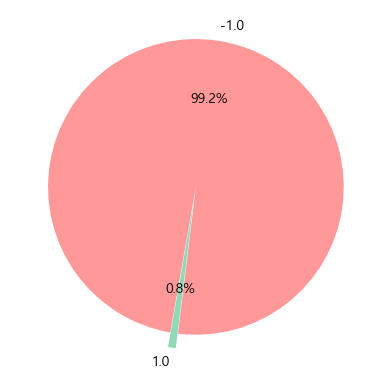

In [64]:
draw_pi(newdata, 'new')

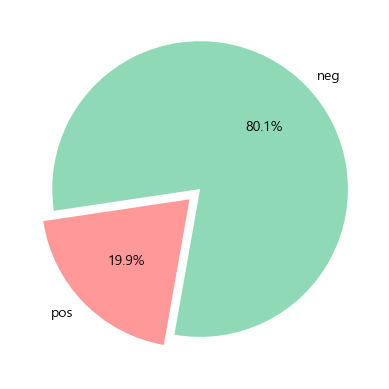

In [68]:
draw_multi_pi(newdata, ['pos', 'neg'])